# Import data dan Library

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Tambahkan nama header kolom
header_kolom = ['Number of Instances', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
              'Total phenols', 'Flavanoids', 'Non Flavanoids phenols', 'Proanthocyanins',
              'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

#Memuat dataframe dangan header kolom
df = pd.read_csv('wine.data', header=None, names=header_kolom)

#Lihat 5 baris pertama dataframe
df.head()

,Number of Instances,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Non Flavanoids phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
#cek jumlah baris dan kolom dari dataframe
print(df.shape)

(178, 14)


In [6]:
#Lihat statistik dataframe
df.describe()

,Number of Instances,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Non Flavanoids phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Memisahkan Kolom target dengan kolom feature

In [7]:
#Pisah Feature dan Target
X = df.drop(columns='Number of Instances', axis=1)
Y = df['Number of Instances']

In [8]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

# Algoritma KNN dan Naive Bayes tanpa pre-procesing

**K-Nearest Neighbor (KNN)**

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate,cross_val_score
modelknn=KNeighborsClassifier(n_neighbors=43, weights='distance')

cv_score1=cross_validate(modelknn,X,Y,cv=5, return_train_score=True)
cv_score2=cross_val_score(modelknn,X,Y,cv=10)

print("Train Score 1:", cv_score1['train_score'].mean())
print("Test Score 1:", cv_score1['test_score'].mean())
print("Train Score 2:", cv_score1['train_score'].mean())
print("Test Score 2:", cv_score2.mean())

Train Score 1: 1.0
Test Score 1: 0.7198412698412698
Train Score 2: 1.0
Test Score 2: 0.7258169934640523


In [10]:
def knn_predict(k) :
    modelknn = KNeighborsClassifier(n_neighbors=k)
    score = cross_validate(modelknn,X,Y,cv=10, return_train_score=True)
    train_score = score['train_score'].mean()
    test_score = score['test_score'].mean()
    return train_score, test_score

In [11]:
#Tuning Hyperparameter KNN manual
train_scores=[]
test_scores=[]
for k in range (2,100):
    train_score, test_score=knn_predict(k)
    train_scores.append(train_score)
    test_scores.append(test_score)

Titik Tertinggi Terletak pada Indeks: 21
Nilai Titik Tertinggi: 0.7310457516339869


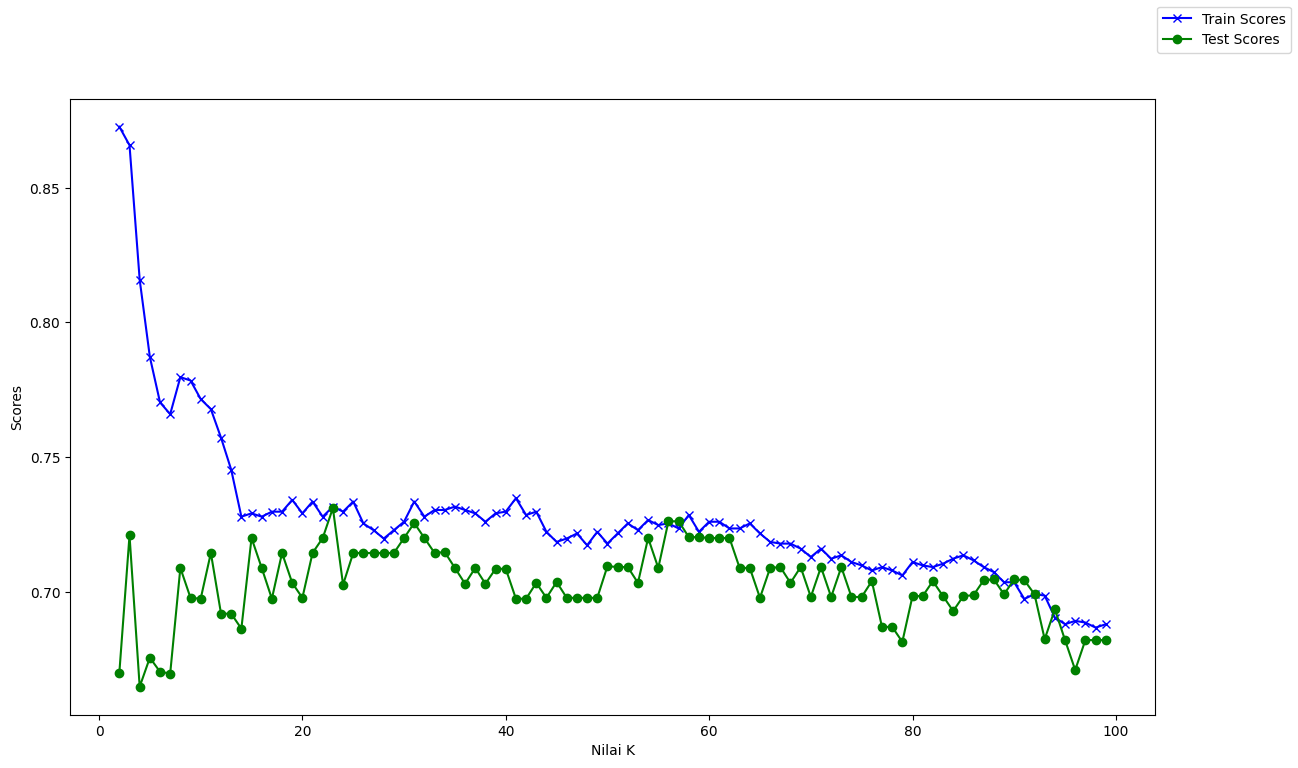

In [12]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(14,8))
ax.plot(range(2,100),train_scores, marker='x', color='b', label='Train Scores')
ax.plot(range(2,100),test_scores, marker='o', color='g', label='Test Scores')
ax.set_xlabel('Nilai K')
ax.set_ylabel('Scores')
fig.legend()
plt.show

# Menggunakan NumPy untuk mencari indeks titik tertinggi
indeks_titik_tertinggi = np.argmax(test_scores)
nilai_titik_tertinggi = test_scores[indeks_titik_tertinggi]

print("Titik Tertinggi Terletak pada Indeks:", indeks_titik_tertinggi)
print("Nilai Titik Tertinggi:", nilai_titik_tertinggi)

In [13]:
#Tuning Hyperparameter KNN otomatis dengan GridSearchCV
from sklearn.model_selection import GridSearchCV
modelknn = KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(5,50),'weights':['distance','uniform']}
gscv=GridSearchCV(modelknn, param_grid=param_grid, scoring='accuracy', cv=5)
gscv.fit(X,Y)
print(gscv.best_params_,gscv.best_score_)

{'n_neighbors': 37, 'weights': 'distance'} 0.7255555555555555


In [14]:
#Tuning Hyperparameter KNN otomatis dengan RandomGridSearchCV , default iter =10
from sklearn.model_selection import RandomizedSearchCV
modelknn = KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(5,50),'weights':['distance','uniform']}
rscv=RandomizedSearchCV(modelknn, param_grid,n_iter=15, scoring='accuracy', cv=5)
rscv.fit(X,Y)
print(rscv.best_params_, rscv.best_score_)

{'weights': 'distance', 'n_neighbors': 37} 0.7255555555555555


**Naive Bayes**

In [15]:
from sklearn.naive_bayes import GaussianNB
modelnb=GaussianNB()

cv_score1=cross_validate(modelnb,X,Y,cv=5, return_train_score=True)
cv_score2=cross_val_score(modelnb,X,Y,cv=10)

print("Train Score 1:", cv_score1['train_score'].mean())
print("Test Score 1:", cv_score1['test_score'].mean())
print("Train Score 2:", cv_score1['train_score'].mean())
print("Test Score 2:", cv_score2.mean())

Train Score 1: 0.988781640894317
Test Score 1: 0.9663492063492063
Train Score 2: 0.988781640894317
Test Score 2: 0.9777777777777779


In [16]:
#Tuning Hyperparameter
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=10,  n_repeats=3, random_state=999)
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

from sklearn.model_selection import GridSearchCV
gs_NB = GridSearchCV(estimator=modelnb, param_grid=param_grid_nb, cv=cv_method,verbose=1,scoring='accuracy')
gs_NB.fit(X,Y)
print(gs_NB.best_params_,gs_NB.best_score_)

Fitting 30 folds for each of 100 candidates, totalling 3000 fits
{'var_smoothing': 2.310129700083158e-09} 0.9716775599128541


# Pre-procesing

**Pemilihan FItur/Atribut penting**
 : Melihat fitur terpenting dari data yang paling berpengaruh pada kolom target (Number of Instances)

Fitur-Fitur Penting:
   Alcohol  Flavanoids  Color intensity   Hue  Proline
0    14.23        3.06             5.64  1.04     1065
1    13.20        2.76             4.38  1.05     1050
2    13.16        3.24             5.68  1.03     1185
3    14.37        3.49             7.80  0.86     1480
4    13.24        2.69             4.32  1.04      735


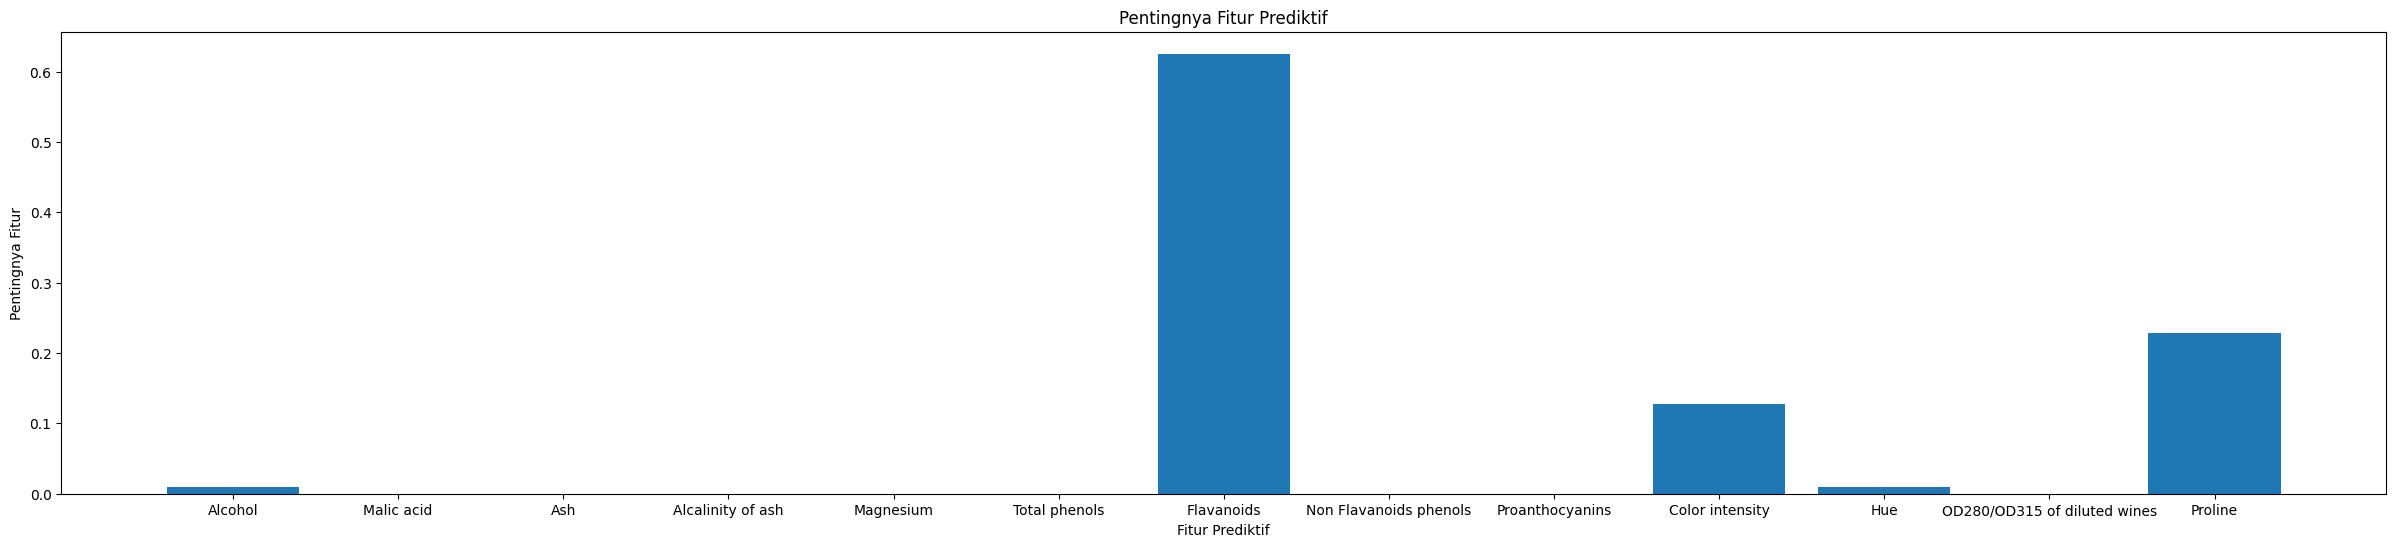

{'Alcohol': 0.009231371397818218, 'Malic acid': 0.0, 'Ash': 0.0, 'Alcalinity of ash': 0.0, 'Magnesium': 0.0, 'Total phenols': 0.0, 'Flavanoids': 0.6253761775523382, 'Non Flavanoids phenols': 0.0, 'Proanthocyanins': 0.0, 'Color intensity': 0.12792536284126277, 'Hue': 0.00921359825303914, 'OD280/OD315 of diluted wines': 0.0, 'Proline': 0.22825348995554154}


In [17]:
from sklearn.tree import DecisionTreeRegressor

# Inisialisasi model pohon keputusan
model = DecisionTreeRegressor()

# Latih model pada data
model.fit(X, Y)

# Dapatkan pentingnya fitur (feature importance) dari model
feature_importance = model.feature_importances_

# Tentukan ambang batas (threshold) untuk kepentingan fitur
threshold = 0.001  # Ganti dengan ambang batas yang sesuai

# Filter fitur-fitur yang penting berdasarkan ambang batas
important_features = X.columns[feature_importance >= threshold]

# Buat DataFrame baru hanya dengan fitur-fitur penting
df_important = X[important_features]

# Tampilkan fitur-fitur penting
print("Fitur-Fitur Penting:")
print(df_important.head())

# Buat plot untuk menampilkan pentingnya fitur-fitur
plt.figure(figsize=(30, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Fitur Prediktif')
plt.ylabel('Pentingnya Fitur')
plt.title('Pentingnya Fitur Prediktif')
plt.show()

print(dict(zip(X.columns, feature_importance)))

**Penanganan Data Duplikat** : Memastikan bahwa data dalam dataframe tidak ada yang terduplikat

In [18]:
# Menampilkan jumlah baris sebelum menghapus data duplikat
print(f"Jumlah baris sebelum menghapus data duplikat: {len(df_important)}")

# Mendeteksi dan menghapus data duplikat
df_important.drop_duplicates(inplace=True)

# Menampilkan jumlah baris setelah menghapus data duplikat
print(f"Jumlah baris setelah menghapus data duplikat: {len(df)}")

print("\nDataFrame setelah proses Penanganan Data Duplikat:\n")

print (df_important)

Jumlah baris sebelum menghapus data duplikat: 178
Jumlah baris setelah menghapus data duplikat: 178

DataFrame setelah proses Penanganan Data Duplikat:

     Alcohol  Flavanoids  Color intensity   Hue  Proline
0      14.23        3.06             5.64  1.04     1065
1      13.20        2.76             4.38  1.05     1050
2      13.16        3.24             5.68  1.03     1185
3      14.37        3.49             7.80  0.86     1480
4      13.24        2.69             4.32  1.04      735
..       ...         ...              ...   ...      ...
173    13.71        0.61             7.70  0.64      740
174    13.40        0.75             7.30  0.70      750
175    13.27        0.69            10.20  0.59      835
176    13.17        0.68             9.30  0.60      840
177    14.13        0.76             9.20  0.61      560

[178 rows x 5 columns]


<ipython-input-18-f78fa22d7798>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_important.drop_duplicates(inplace=True)


**Penanganan Data Hilang (missing value)** : Mengatasi nilai-nilai yang kosong atau hilang dalam dataframe

In [19]:
#Cek missing value
missing_value_cek = df_important.isnull().sum()
missing_value_cek

Alcohol            0
Flavanoids         0
Color intensity    0
Hue                0
Proline            0
dtype: int64

**Standarisasi** : Mengubah skala atau rentang atribut dalam dataset
agar memiliki skala yang seragam

In [20]:
#Standarisasi feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized = scaler.fit_transform(df_important)

stardardized_data = pd.DataFrame(standardized, columns = important_features)
stardardized_data.head()

,Alcohol,Flavanoids,Color intensity,Hue,Proline
0,1.518613,1.034819,0.251717,0.362177,1.013009
1,0.246290,0.733629,-0.293321,0.406051,0.965242
2,0.196879,1.215533,0.269020,0.318304,1.395148
3,1.691550,1.466525,1.186068,-0.427544,2.334574
4,0.295700,0.663351,-0.319276,0.362177,-0.037874


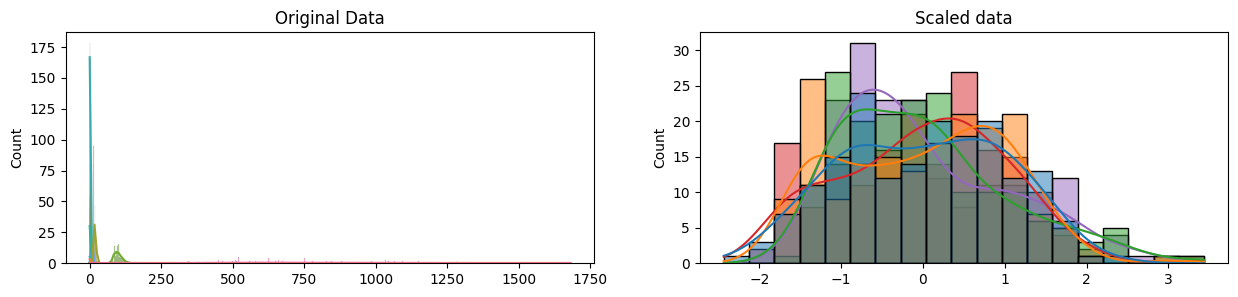

In [21]:
# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(X, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(stardardized_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

**Reduksi dimensi data** : Mengurangi jumlah atribut dalam dataset sambil
mempertahankan informasi yang paling penting (Agar tidak terlalu banyak atribut)

In [22]:
from sklearn.decomposition import PCA

n_components = 4  # Ganti dengan jumlah komponen yang diinginkan
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(stardardized_data)

X_pca = pd.DataFrame(X_pca, columns = ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4'])
X_pca.head()

,PCA_1,PCA_2,PCA_3,PCA_4
0,2.048496,-0.301984,-0.017143,0.553781
1,0.990484,-0.777030,0.045592,-0.183364
2,1.592071,-0.667291,0.497071,-0.573196
3,3.336706,0.480617,0.564306,-0.212763
4,0.357630,-0.653721,0.184987,0.407530


**Resampling data kelas yang tidak seimbang** : mengatasi ketidakseimbangan kelas dengan menambahkan atau mengurangi sampel pada kelas minoritas atau mayoritas

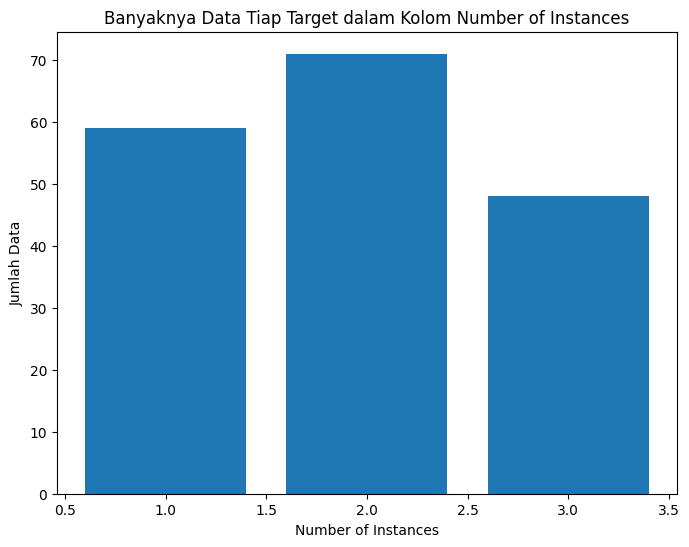

{1: 59, 2: 71, 3: 48}


In [23]:
# Membuat array dengan jumlah unik target dan jumlah data untuk masing-masing target
unique_targets, target_counts = np.unique(Y, return_counts=True)

# Membuat plot batang untuk menampilkan banyaknya data untuk tiap target
plt.figure(figsize=(8, 6))
plt.bar(unique_targets, target_counts)
plt.xlabel('Number of Instances')
plt.ylabel('Jumlah Data')
plt.title('Banyaknya Data Tiap Target dalam Kolom Number of Instances')
plt.show()

unique_targets, target_counts = np.unique(Y, return_counts=True)
print(dict(zip(unique_targets, target_counts)))

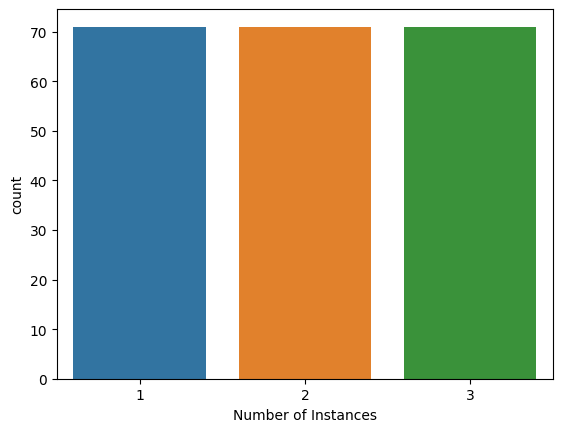

{1: 71, 2: 71, 3: 71}


In [24]:
from imblearn.over_sampling import RandomOverSampler

resamp = RandomOverSampler()
balX, balY = resamp.fit_resample(X_pca, Y)

sns.countplot(x=balY)
plt.show()

unique_targets, target_counts = np.unique(balY, return_counts=True)
print(dict(zip(unique_targets, target_counts)))

# Algoritma KNN dan Naive Bayes setelah pre-procesing

**K-Nearest Neighbor (KNN)**

In [25]:
modelknn=KNeighborsClassifier(n_neighbors=43, weights='distance')

cv_score1=cross_validate(modelknn,balX,balY,cv=5, return_train_score=True)
cv_score2=cross_val_score(modelknn,balX,balY,cv=10)

print("Train Score 1:", cv_score1['train_score'].mean())
print("Test Score 1:", cv_score1['test_score'].mean())
print("Train Score 2:", cv_score1['train_score'].mean())
print("Test Score 2:", cv_score2.mean())

Train Score 1: 1.0
Test Score 1: 0.9767441860465116
Train Score 2: 1.0
Test Score 2: 0.9770562770562771


In [26]:
def knn_predict(k) :
    modelknn = KNeighborsClassifier(n_neighbors=k)
    score = cross_validate(modelknn,balX,balY,cv=10, return_train_score=True)
    train_score = score['train_score'].mean()
    test_score = score['test_score'].mean()
    return train_score, test_score

In [27]:
#Tuning Hyperparameter KNN manual
train_scores=[]
test_scores=[]
for k in range (2,100):
    train_score, test_score=knn_predict(k)
    train_scores.append(train_score)
    test_scores.append(test_score)

Titik Tertinggi Terletak pada Indeks: 57
Nilai Titik Tertinggi: 0.9818181818181818


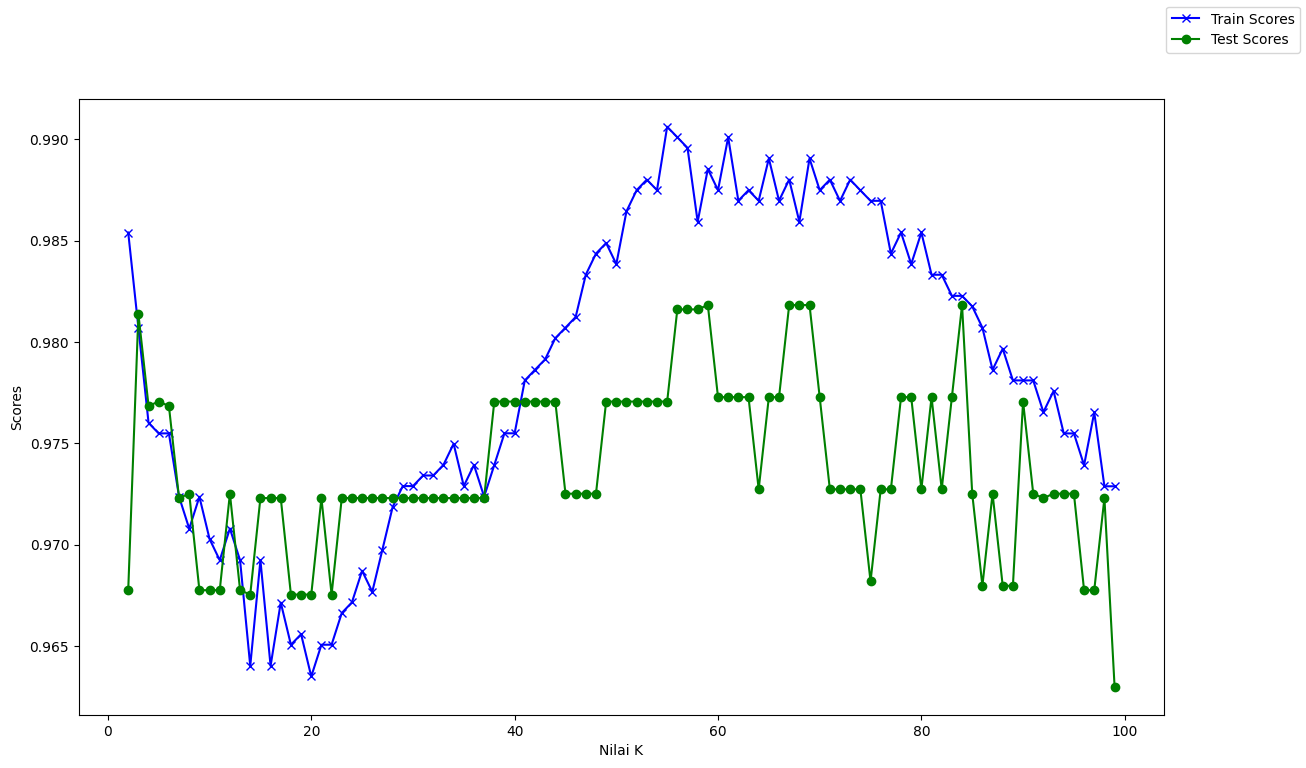

In [28]:
fig,ax = plt.subplots(figsize=(14,8))
ax.plot(range(2,100),train_scores, marker='x', color='b', label='Train Scores')
ax.plot(range(2,100),test_scores, marker='o', color='g', label='Test Scores')
ax.set_xlabel('Nilai K')
ax.set_ylabel('Scores')
fig.legend()
plt.show

# Menggunakan NumPy untuk mencari indeks titik tertinggi
indeks_titik_tertinggi = np.argmax(test_scores)
nilai_titik_tertinggi = test_scores[indeks_titik_tertinggi]

print("Titik Tertinggi Terletak pada Indeks:", indeks_titik_tertinggi)
print("Nilai Titik Tertinggi:", nilai_titik_tertinggi)

In [29]:
modelknn = KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(5,50),'weights':['distance','uniform']}
gscv=GridSearchCV(modelknn, param_grid=param_grid, scoring='accuracy', cv=5)
gscv.fit(balX,balY)
print(gscv.best_params_,gscv.best_score_)

{'n_neighbors': 5, 'weights': 'distance'} 0.9767441860465116


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Model K-Nearest Neighbors
modelknn = KNeighborsClassifier()

# Hyperparameter yang akan diuji
param_grid = {'n_neighbors': np.arange(5, 50), 'weights': ['distance', 'uniform']}

# GridSearchCV
gscv = GridSearchCV(modelknn, param_grid=param_grid, scoring='accuracy', cv=5)
gscv.fit(balX, balY)

# Tampilkan parameter terbaik dan skor akurasi terbaik
print("Best Parameters:", gscv.best_params_)
print("Best Accuracy:", gscv.best_score_)

# Prediksi terhadap data latih dengan model terbaik
y_pred = gscv.predict(balX)

# Tampilkan laporan klasifikasi yang mencakup akurasi dan F1-Score
report = classification_report(balY, y_pred)
print("Classification Report:\n", report)


Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}
Best Accuracy: 0.9767441860465116
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        71
           3       1.00      1.00      1.00        71

    accuracy                           1.00       213
   macro avg       1.00      1.00      1.00       213
weighted avg       1.00      1.00      1.00       213



In [31]:
#Tuning Hyperparameter KNN otomatis dengan RandomGridSearchCV , default iter =10
from sklearn.model_selection import RandomizedSearchCV
modelknn = KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(5,50),'weights':['distance','uniform']}
rscv=RandomizedSearchCV(modelknn, param_grid,n_iter=15, scoring='accuracy', cv=5)
rscv.fit(balX,balY)
print(rscv.best_params_, rscv.best_score_)

{'weights': 'distance', 'n_neighbors': 11} 0.9767441860465116


**Naive Bayes**

In [32]:
from sklearn.naive_bayes import GaussianNB
modelnb=GaussianNB()

cv_score1=cross_validate(modelnb,balX,balY,cv=5, return_train_score=True)
cv_score2=cross_val_score(modelnb,balX,balY,cv=10)

print("Train Score 1:", cv_score1['train_score'].mean())
print("Test Score 1:", cv_score1['test_score'].mean())
print("Train Score 2:", cv_score1['train_score'].mean())
print("Test Score 2:", cv_score2.mean())

Train Score 1: 0.9882765737874097
Test Score 1: 0.9719822812846068
Train Score 2: 0.9882765737874097
Test Score 2: 0.9861471861471862


In [33]:
#Tuning Hyperparameter
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=10,  n_repeats=3, random_state=999)
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

from sklearn.model_selection import GridSearchCV
gs_NB = GridSearchCV(estimator=modelnb, param_grid=param_grid_nb, cv=cv_method,verbose=1,scoring='accuracy')
gs_NB.fit(balX,balY)
print(gs_NB.best_params_,gs_NB.best_score_)

Fitting 30 folds for each of 100 candidates, totalling 3000 fits
{'var_smoothing': 0.3511191734215131} 0.989033189033189


In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report
import numpy as np

# ...

# Model Gaussian Naive Bayes
modelnb = GaussianNB()

# Evaluasi model dengan cross-validation
cv_score1 = cross_validate(modelnb, balX, balY, cv=5, return_train_score=True)
cv_score2 = cross_val_score(modelnb, balX, balY, cv=10)

print("Train Score 1:", cv_score1['train_score'].mean())
print("Test Score 1:", cv_score1['test_score'].mean())
print("Train Score 2:", cv_score1['train_score'].mean())
print("Test Score 2:", cv_score2.mean())

# Tuning Hyperparameter
cv_method = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=999)
param_grid_nb = {'var_smoothing': np.logspace(0, -9, num=100)}

# GridSearchCV dengan scoring='accuracy' dan 'F1'
gs_NB = GridSearchCV(estimator=modelnb, param_grid=param_grid_nb, cv=cv_method, verbose=1,
                     scoring={'Accuracy': 'accuracy', 'F1-Score': 'f1_macro'}, refit='F1-Score')
gs_NB.fit(balX, balY)

# Tampilkan laporan klasifikasi
y_pred = gs_NB.predict(balX)  # Prediksi terhadap data latih
report = classification_report(balY, y_pred)
print("Classification Report:\n", report)


Train Score 1: 0.9882765737874097
Test Score 1: 0.9719822812846068
Train Score 2: 0.9882765737874097
Test Score 2: 0.9861471861471862
Fitting 30 folds for each of 100 candidates, totalling 3000 fits
Classification Report:
               precision    recall  f1-score   support

           1       0.99      1.00      0.99        71
           2       1.00      0.97      0.99        71
           3       0.99      1.00      0.99        71

    accuracy                           0.99       213
   macro avg       0.99      0.99      0.99       213
weighted avg       0.99      0.99      0.99       213

